In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


0
0.08854 0.08854 3.2603266549594423 0.9988983918478107 1.0 37.99417875185532


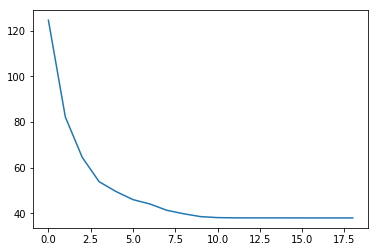

In [6]:
#  PROX GD SOLVE



import numpy as np
import random as rnd
import time as tm

from matplotlib import pyplot as plt
# SUBMIT YOUR CODE AS A SINGLE PYTHON (.PY) FILE INSIDE A ZIP ARCHIVE
# THE NAME OF THE PYTHON FILE MUST BE SUBMIT.PY
# DO NOT INCLUDE PACKAGES LIKE SKLEARN, SCIPY, KERAS ETC IN YOUR CODE
# THE USE OF ANY MACHINE LEARNING LIBRARIES FOR WHATEVER REASON WILL RESULT IN A STRAIGHT ZERO
# THIS IS BECAUSE THESE PACKAGES CONTAIN SOLVERS WHICH MAKE THIS ASSIGNMENT TRIVIAL

# DO NOT CHANGE THE NAME OF THE METHOD "solver" BELOW. THIS ACTS AS THE MAIN METHOD AND
# WILL BE INVOKED BY THE EVALUATION SCRIPT. CHANGING THIS NAME WILL CAUSE EVALUATION FAILURES


def stepLengthGenerator(mode, eta):
    if mode == "constant":
        return lambda t: eta
    elif mode == "linear":
        return lambda t: eta/(t+1)
    elif mode == "quadratic":
        return lambda t: eta/np.sqrt(t+1)

# You may define any new functions, variables, classes here
# For example, functions to calculate next coordinate or step length
def normalGD(X, y, w):
    value=2*((X.T)@(X@w-y))
    return value

def LassoGD(X, y, wHat):
    res = X.dot(wHat)-y
    GradL = (np.sign(wHat))+2*X.T.dot(res)
    return GradL

def Softhreshold(w,StepFunc,t):
    alpha = StepFunc(t)
    # alpha = stepLengthGenerator( "linear", eta )
    prox = np.zeros_like(w)
    for i in range(len(w)):
        if w[i] > alpha:
            prox[i] = w[i]-alpha
        elif w[i] < -alpha:
            prox[i] = w[i]+alpha
        else:
            prox[i] = 0
    return prox

def DoGD(X,y,w,stepFunc,t):
    g = LassoGD(X, y, w)
    w = w-stepFunc(t)*g
    return w

def DoProxGD(X,y,w,StepFunc,t):
    g=normalGD(X,y,w)
    alpha = StepFunc(t)
    w_new=Softhreshold(w-alpha*g,StepFunc,t)
    return w_new

def DoCD(X,y,w,StepFunc,t):
    alpha = 1
    (n, d) = X.shape
    z  = np.sum(X**2,axis=0)
    # used 'a' for random permutation CD 
    a = np.random.permutation(d)
    for j in range(d):
        # pho = 0
        j = a[j]
        Xj = X[:,j]
        res = y-X.dot(w)+w[j]*Xj
        pho = Xj.T.dot(res)
        g = -2*pho + 2*w[j]*z[j]+alpha*np.sign(w[j])
        w[j] = w[j]-StepFunc(t)*g 
    return w     
    # gt =
    # w[i]=w[i]-StepFunc(t)*gt
    # np.put(w,i,w[i])

def getObjValue(X, y, wHat):
    lassoLoss = np.linalg.norm(wHat, 1) + pow(np.linalg.norm(X.dot(wHat) - y, 2), 2)
    return lassoLoss
################################
# Non Editable Region Starting #
################################


def solver(X, y, timeout, spacing, eta):
    (n, d) = X.shape
    t = 0
    totTime = 0

    # w is the model vector and will get returned once timeout happens
    # w = 1.5*np.ones((d,))
    w = np.zeros((d,))
    tic = tm.perf_counter()
################################
#  Non Editable Region Ending  #
################################
    # You may reinitialize w to your liking here
    # You may also define new variables here e.g. step_length, mini-batch size etc
    # eta = 5e-3
    # takes time around 10
    
    # eta = 0.01
    # above value and quadratic for GD
    # allowed to take such large step?
    
    # eta = 0.32
    # above value and linear for CD 
    
    B = 100
    # GD works well with quadratic step function
    stepFunc = stepLengthGenerator( "constant", eta )

    # coordinateGenerator(mode, d)

    # w = np.ones((d,))
    objValseries = []
################################
# Non Editable Region Starting #
################################
    while True:
        t = t + 1
        if t % spacing == 0:
            toc = tm.perf_counter()
            totTime = totTime + (toc - tic)
            if totTime > timeout:
                return (w, totTime, objValseries)
            else:
                tic = tm.perf_counter()
################################
#  Non Editable Region Ending  #
################################

        # w = DoGD(X,y,w,stepFunc,t)
        w = DoProxGD(X,y,w,stepFunc,t)
        # w = DoCD(X,y,w,stepFunc,t)

        objValseries = np.append(objValseries,getObjValue(X,y,w))
    # Write all code to perform your method updates here within the infinite while loop
    # The infinite loop will terminate once timeout is reached
    # Do not try to bypass the timer check e.g. by using continue
    # It is very easy for us to detect such bypasses which will be strictly penalized

    # Please note that once timeout is reached, the code will simply return w
    # Thus, if you wish to return the average model (as is sometimes done for GD),
    # you need to make sure that w stores the average at all times
    # One way to do so is to define a "running" variable w_run
    # Make all GD updates to w_run e.g. w_run = w_run - step * delw
    # Then use a running average formula to update w
    # w = (w * (t-1) + w_run)/t
    # This way, w will always store the average and can be returned at any time
    # In this scheme, w plays the role of the "cumulative" variable in the course module optLib
    # w_run on the other hand, plays the role of the "theta" variable in the course module optLib

    return (w, totTime, objValseries)  # This return statement will never be reached



N = 100
eta = np.linspace(0.1,0.34,N)
# # eta = [0.5]
# eta = [0.376]
eta=[0.08854]
# eta =0.04 constant 37 1
# eta 0.3 linear 2 41
# traindata = np.loadtxt( "/content/drive/My Drive/assn1/train" )
# wAst = np.loadtxt( "/content/drive/My Drive/assn1 (1)/assn1/wAstTrain" )
traindata = np.loadtxt( "train" )
wAst = np.loadtxt( "wAstTrain" )
k = 20
# objValseries = []
y = traindata[:,0]
X = traindata[:,1:]

ObjValBest = getObjValue(X,y,wAst)

# Tuning eta
min1 = 1000
min2 = 1000

for i in range(1):
    
    (w,totTime,objValseries)=solver(X,y,0.1,10,eta[i])
# print (w)
    wsparse_idx = np.argsort( np.abs(w) )[::-1][:20]
    w2 = w[wsparse_idx]
    
    wreduce_idx = np.argsort( np.abs(w) )[0:979]
    w[wreduce_idx] = 0
    ObjCal = getObjValue(X,y,w)
# removing the remaining indices from w
# w1 = w
# np.put(w1,wsparse_idx,np.zeros(20))
#
# wsparse = w - w1
# print (w)
    
    norm1 = np.linalg.norm(w,2)
    normBest = np.linalg.norm(wAst,2)
    
    if np.abs(ObjValBest-ObjCal) < min1:
        min1 =  np.abs(ObjValBest-ObjCal)
        eta_cr_o = eta[i]
        ObjCal1 = ObjCal
    
    if np.abs(norm1 - normBest) < min2:
        min2 = np.abs(norm1 - normBest)
        eta_cr = eta[i]
    
    idxAst = np.abs(wAst).argsort()[::-1][:k]
    idxHat = np.abs(w).argsort()[::-1][:k]
    a = np.zeros_like( wAst )
    a[idxAst] = 1
    b = np.zeros_like( wAst )
    b[idxHat] = 1
    min3 = np.linalg.norm( a - b, 1 )//2
    # print (normBest,norm1)
    # print (ObjValBest,objValseries[-1])
    print (i)

print (eta_cr,eta_cr_o,min1,min2,min3,ObjCal1)

# Plot the objective value function
plt.plot(objValseries)
plt.show()

# bJw9dPi8bZPSCTM


4.0 43.314868691773455


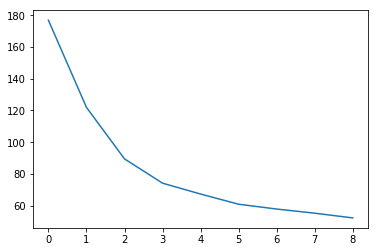

In [8]:
# Coordinate Descent



from matplotlib import pyplot as plt
# SUBMIT YOUR CODE AS A SINGLE PYTHON (.PY) FILE INSIDE A ZIP ARCHIVE
# THE NAME OF THE PYTHON FILE MUST BE SUBMIT.PY
# DO NOT INCLUDE PACKAGES LIKE SKLEARN, SCIPY, KERAS ETC IN YOUR CODE
# THE USE OF ANY MACHINE LEARNING LIBRARIES FOR WHATEVER REASON WILL RESULT IN A STRAIGHT ZERO
# THIS IS BECAUSE THESE PACKAGES CONTAIN SOLVERS WHICH MAKE THIS ASSIGNMENT TRIVIAL

# DO NOT CHANGE THE NAME OF THE METHOD "solver" BELOW. THIS ACTS AS THE MAIN METHOD AND
# WILL BE INVOKED BY THE EVALUATION SCRIPT. CHANGING THIS NAME WILL CAUSE EVALUATION FAILURES


def stepLengthGenerator(mode, eta):
    if mode == "constant":
        return lambda t: eta
    elif mode == "linear":
        return lambda t: eta/(t+1)
    elif mode == "quadratic":
        return lambda t: eta/np.sqrt(t+1)

# You may define any new functions, variables, classes here
# For example, functions to calculate next coordinate or step length
def LassoGD(X, y, wHat):
    res = X.dot(wHat)-y
    GradL = (np.sign(wHat))+2*X.T.dot(res)
    return GradL

def Softhreshold(w,stepFunc,t):
    # alpha = stepFunc(t)
    # alpha = stepLengthGenerator( "linear", eta )
    prox = np.zeros_like(w)
    for i in range(len(w)):
        if w[i] > alpha:
            prox[i] = w[i]-alpha
        elif w[i] < -alpha:
            prox[i] = w[i]+alpha
        else:
            prox[i] = 0
    return prox

def DoGD(X,y,w,stepFunc,t):
    g = LassoGD(X, y, w)
    w = w-stepFunc(t)*g
    return w

def DoProxGD(X,y,w,stepFunc,t):
    res = X.dot(w)-y
    wp = w-stepFunc(t)*X.T.dot(res)
    prox1 = Softhreshold(wp,stepFunc,t)
    return prox1

def DoCD(X,y,w,StepFunc,t):
    alpha = 1
    (n, d) = X.shape
    z  = np.sum(X**2,axis=0)
    # used 'a' for random permutation CD 
    a = np.random.permutation(d)
    for j in range(d):
        # pho = 0
        j = a[j]
        Xj = X[:,j]
        res = y-X.dot(w)+w[j]*Xj
        pho = Xj.T.dot(res)
        # for i in range(n):
        #     if i!=j:
        #         pho = pho + X[i][j]*(y[i]-y[i]*w[j])
        #     else:
        #         pho = pho + X[i][j]*y[i]
        # if pho < -alpha/2:
        #     w[j] = (pho + alpha/2)/z[j]
        # elif pho > alpha/2:
        #     w[j] = (pho - alpha/2)/z[j]
        # else:
        #     w[j] = 0
        g = -2*pho + 2*w[j]*z[j]+alpha*np.sign(w[j])
        w[j] = w[j]-StepFunc(t)*g 
    return w     
    # gt =
    # w[i]=w[i]-StepFunc(t)*gt
    # np.put(w,i,w[i])

def getObjValue(X, y, wHat):
    lassoLoss = np.linalg.norm(wHat, 1) + pow(np.linalg.norm(X.dot(wHat) - y, 2), 2)
    return lassoLoss
################################
# Non Editable Region Starting #
################################


def solver(X, y, timeout, spacing):
    (n, d) = X.shape
    t = 0
    totTime = 0

    # w is the model vector and will get returned once timeout happens
    # w = 1.5*np.ones((d,))
    w = np.zeros((d,))
    tic = tm.perf_counter()
################################
#  Non Editable Region Ending  #
################################
    # You may reinitialize w to your liking here
    # You may also define new variables here e.g. step_length, mini-batch size etc
    # eta = 5e-3
    # takes time around 10
    
    # eta = 0.01
    # above value and quadratic for GD
    # allowed to take such large step?
#     eta = 0.24646
    eta = 0.3
    # above value and linear for CD 
    B = 100
    # GD works well with quadratic step function
    stepFunc = stepLengthGenerator( "linear", eta )

    # coordinateGenerator(mode, d)

    # w = np.ones((d,))
    objValseries = []
################################
# Non Editable Region Starting #
################################
    while True:
        t = t + 1
        if t % spacing == 0:
            toc = tm.perf_counter()
            totTime = totTime + (toc - tic)
            if totTime > timeout:
                return (w, totTime, objValseries)
            else:
                tic = tm.perf_counter()
################################
#  Non Editable Region Ending  #
################################

        # w = DoGD(X,y,w,stepFunc,t)
        # w = DoProxGD(X,y,w,stepFunc,t)
        w = DoCD(X,y,w,stepFunc,t)
        objValseries = np.append(objValseries,getObjValue(X,y,w))
    # Write all code to perform your method updates here within the infinite while loop
    # The infinite loop will terminate once timeout is reached
    # Do not try to bypass the timer check e.g. by using continue
    # It is very easy for us to detect such bypasses which will be strictly penalized

    # Please note that once timeout is reached, the code will simply return w
    # Thus, if you wish to return the average model (as is sometimes done for GD),
    # you need to make sure that w stores the average at all times
    # One way to do so is to define a "running" variable w_run
    # Make all GD updates to w_run e.g. w_run = w_run - step * delw
    # Then use a running average formula to update w
    # w = (w * (t-1) + w_run)/t
    # This way, w will always store the average and can be returned at any time
    # In this scheme, w plays the role of the "cumulative" variable in the course module optLib
    # w_run on the other hand, plays the role of the "theta" variable in the course module optLib

    return (w, totTime, objValseries)  # This return statement will never be reached


# traindata = np.loadtxt( "/content/drive/My Drive/assn1/train" )
# wAst = np.loadtxt( "/content/drive/My Drive/assn1 (1)/assn1/wAstTrain" )
traindata = np.loadtxt( "train" )
wAst = np.loadtxt( "wAstTrain" )
# wAst = np.loadtxt( "wAstTrain" )
k = 20
# objValseries = []
y = traindata[:,0]
X = traindata[:,1:]

ObjValBest = getObjValue(X,y,wAst)

(w,totTime,objValseries)=solver(X,y,0.1,10)
# print (w)
wsparse_idx = np.argsort( np.abs(w) )[::-1][:20]
w2 = w[wsparse_idx]
    
wreduce_idx = np.argsort( np.abs(w) )[0:799]
w[wreduce_idx] = 0
ObjCal = getObjValue(X,y,w)
    
norm1 = np.linalg.norm(w,2)
normBest = np.linalg.norm(wAst,2)
    
idxAst = np.abs(wAst).argsort()[::-1][:k]
idxHat = np.abs(w).argsort()[::-1][:k]
a = np.zeros_like( wAst )
a[idxAst] = 1
b = np.zeros_like( wAst )
b[idxHat] = 1
diff_ind = np.linalg.norm( a - b, 1 )//2

print (diff_ind,ObjCal)

# Plot the objective value function
plt.plot(objValseries)
plt.show()

# bJw9dPi8bZPSCTM

In [39]:
# Tuning of eta



import numpy as np
import random as rnd
import time as tm

from matplotlib import pyplot as plt
# SUBMIT YOUR CODE AS A SINGLE PYTHON (.PY) FILE INSIDE A ZIP ARCHIVE
# THE NAME OF THE PYTHON FILE MUST BE SUBMIT.PY
# DO NOT INCLUDE PACKAGES LIKE SKLEARN, SCIPY, KERAS ETC IN YOUR CODE
# THE USE OF ANY MACHINE LEARNING LIBRARIES FOR WHATEVER REASON WILL RESULT IN A STRAIGHT ZERO
# THIS IS BECAUSE THESE PACKAGES CONTAIN SOLVERS WHICH MAKE THIS ASSIGNMENT TRIVIAL

# DO NOT CHANGE THE NAME OF THE METHOD "solver" BELOW. THIS ACTS AS THE MAIN METHOD AND
# WILL BE INVOKED BY THE EVALUATION SCRIPT. CHANGING THIS NAME WILL CAUSE EVALUATION FAILURES


def stepLengthGenerator(mode, eta):
    if mode == "constant":
        return lambda t: eta
    elif mode == "linear":
        return lambda t: eta/(t+1)
    elif mode == "quadratic":
        return lambda t: eta/np.sqrt(t+1)

# You may define any new functions, variables, classes here
# For example, functions to calculate next coordinate or step length
def normalGD(X, y, w):
    value=2*((X.T)@(X@w-y))
    return value

def LassoGD(X, y, wHat):
    res = X.dot(wHat)-y
    GradL = (np.sign(wHat))+2*X.T.dot(res)
    return GradL

def Softhreshold(w,StepFunc,t):
    alpha = StepFunc(t)
    # alpha = stepLengthGenerator( "linear", eta )
    prox = np.zeros_like(w)
    for i in range(len(w)):
        if w[i] > alpha:
            prox[i] = w[i]-alpha
        elif w[i] < -alpha:
            prox[i] = w[i]+alpha
        else:
            prox[i] = 0
    return prox

def DoGD(X,y,w,stepFunc,t):
    g = LassoGD(X, y, w)
    w = w-stepFunc(t)*g
    return w

def DoProxGD(X,y,w,StepFunc,t):
    g=normalGD(X,y,w)
    alpha = StepFunc(t)
    w_new=Softhreshold(w-alpha*g,StepFunc,t)
    return w_new

def DoCD(X,y,w,StepFunc,t):
    alpha = 1
    (n, d) = X.shape
    z  = np.sum(X**2,axis=0)
    # used 'a' for random permutation CD 
    a = np.random.permutation(d)
    for j in range(d):
        # pho = 0
        j = a[j]
        Xj = X[:,j]
        res = y-X.dot(w)+w[j]*Xj
        pho = Xj.T.dot(res)
        g = -2*pho + 2*w[j]*z[j]+alpha*np.sign(w[j])
        w[j] = w[j]-StepFunc(t)*g 
    return w     
    # gt =
    # w[i]=w[i]-StepFunc(t)*gt
    # np.put(w,i,w[i])

def getObjValue(X, y, wHat):
    lassoLoss = np.linalg.norm(wHat, 1) + pow(np.linalg.norm(X.dot(wHat) - y, 2), 2)
    return lassoLoss
################################
# Non Editable Region Starting #
################################


def solver(X, y, timeout, spacing, eta):
    (n, d) = X.shape
    t = 0
    totTime = 0

    # w is the model vector and will get returned once timeout happens
    # w = 1.5*np.ones((d,))
    w = np.zeros((d,))
    tic = tm.perf_counter()
################################
#  Non Editable Region Ending  #
################################
    # You may reinitialize w to your liking here
    # You may also define new variables here e.g. step_length, mini-batch size etc
    # eta = 5e-3
    # takes time around 10
    
    # eta = 0.01
    # above value and quadratic for GD
    # allowed to take such large step?
    
    # eta = 0.32
    # above value and linear for CD 
    
    B = 100
    # GD works well with quadratic step function
    stepFunc = stepLengthGenerator( "constant", eta )

    # coordinateGenerator(mode, d)

    # w = np.ones((d,))
    objValseries = []
################################
# Non Editable Region Starting #
################################
    while True:
        t = t + 1
        if t % spacing == 0:
            toc = tm.perf_counter()
            totTime = totTime + (toc - tic)
            if totTime > timeout:
                return (w, totTime, objValseries)
            else:
                tic = tm.perf_counter()
################################
#  Non Editable Region Ending  #
################################

        # w = DoGD(X,y,w,stepFunc,t)
        w = DoProxGD(X,y,w,stepFunc,t)
        # w = DoCD(X,y,w,stepFunc,t)

        objValseries = np.append(objValseries,getObjValue(X,y,w))
    # Write all code to perform your method updates here within the infinite while loop
    # The infinite loop will terminate once timeout is reached
    # Do not try to bypass the timer check e.g. by using continue
    # It is very easy for us to detect such bypasses which will be strictly penalized

    # Please note that once timeout is reached, the code will simply return w
    # Thus, if you wish to return the average model (as is sometimes done for GD),
    # you need to make sure that w stores the average at all times
    # One way to do so is to define a "running" variable w_run
    # Make all GD updates to w_run e.g. w_run = w_run - step * delw
    # Then use a running average formula to update w
    # w = (w * (t-1) + w_run)/t
    # This way, w will always store the average and can be returned at any time
    # In this scheme, w plays the role of the "cumulative" variable in the course module optLib
    # w_run on the other hand, plays the role of the "theta" variable in the course module optLib

    return (w, totTime, objValseries)  # This return statement will never be reached



# cross-validation
k_f=5
idx=np.arange(800)
# data = np.loadtxt( "/content/drive/My Drive/assn1/train" )
# wAst = np.loadtxt( "/content/drive/My Drive/assn1 (1)/assn1/wAstTrain" )
traindata = np.loadtxt( "train" )
wAst = np.loadtxt( "wAstTrain" )
k = 20
N = 100
eta = np.linspace(0.01,0.1,N)
# objValseries = []
y = data[:,0]
X = data[:,1:]
splits=np.split(idx, 5)
# w_f=w_0
val_f=np.ones(6)

min3 = 1000

for j in range(N):
  
  Y_err = 0

  for i in range(k_f):
    
    X_test=X[splits[i]]
    X_train=X[~np.isin(idx,splits[i])]
    y_test=y[splits[i]]
    y_train=y[~np.isin(idx,splits[i])]


    # N = 100
    # eta = np.linspace(0.1,0.34,N)
    # # eta = [0.5]
    # eta = [0.376]
    # eta=[0.06]
    # eta =0.04 constant 37 1
    # eta 0.3 linear 2 41

    ObjValBest = getObjValue(X,y,wAst)

    # Tuning eta
    # min1 = 1000
    # min2 = 1000

    (w,totTime,objValseries)=solver(X_train,y_train,0.1,10,eta[j])
    # print (w)

    # wsparse_idx = np.argsort( np.abs(w) )[::-1][:20]
    # w2 = w[wsparse_idx]

    wreduce_idx = np.argsort( np.abs(w) )[0:799]
    w[wreduce_idx] = 0

    ObjTest = getObjValue(X_test,y_test,w)
    Y_err = Y_err + np.linalg.norm(X_test.dot(w)-y_test)



  if Y_err < min3:
    min3 = Y_err
    eta_cr = eta[j]
    Y_cr = Y_err
  # ObjCal = getObjValue(X,y,w)
  # removing the remaining indices from w
  # w1 = w
  # np.put(w1,wsparse_idx,np.zeros(20))
  #
  # plt.plot(objValseries)
  # plt.show()
  # wsparse = w - w1
  print (j)

print(eta_cr,min3)
#   norm1 = np.linalg.norm(w,2)
#   normBest = np.linalg.norm(wAst,2)

#   if np.abs(ObjValBest-ObjCal) < min1:
#     min1 =  np.abs(ObjValBest-ObjCal)
#     eta_cr_o = eta[i]
#     ObjCal1 = ObjCal

#   if np.abs(norm1 - normBest) < min2:
#     min2 = np.abs(norm1 - normBest)
#     eta_cr = eta[i]

#   idxAst = np.abs(wAst).argsort()[::-1][:k]
#   idxHat = np.abs(w).argsort()[::-1][:k]
#   a = np.zeros_like( wAst )
#   a[idxAst] = 1
#   b = np.zeros_like( wAst )
#   b[idxHat] = 1
#   min3 = np.linalg.norm( a - b, 1 )//2
#   # print (normBest,norm1)
#   # print (ObjValBest,objValseries[-1])
#   print (i)

# print (eta_cr,eta_cr_o,min1,min2,min3,ObjCal1)

# # Plot the objective value function
# plt.plot(objValseries)
# plt.show()

# bJw9dPi8bZPSCTM







0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0.09000000000000001 10.146170730700945


In [32]:
print(np.linalg.norm(X.dot(wAst)))

15.55549578433654
